In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from datetime import datetime

mpl.rcParams['figure.figsize'] = (16,9)
pd.set_option('display.max_rows', 500)

import seaborn as sns
sns.set(style="darkgrid")

In [2]:
df_analyse = pd.read_csv('...\\data\\processed\\COVID_table_small_1.csv' , sep=';')
df_analyse.sort_values('date',ascending = True).head()

,date,India,United Kingdom,US,Germany,Italy,Canada,Spain
0,2020-01-22,0,0,1,0,0,0,0
1,2020-01-23,0,0,1,0,0,0,0
2,2020-01-24,0,0,2,0,0,0,0
3,2020-01-25,0,0,2,0,0,0,0
4,2020-01-26,0,0,5,0,0,1,0


In [3]:
N0 = 1000000
beta = 0.4
gamma = 0.1

I0 = df_analyse.Germany[35]
S0 = N0-I0
R0 = 0

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0           
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])

In [5]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns = {'susceptible':S0,
                                           'infected':I0,
                                           'recovered':R0})



for each_t in np.arange(100):
   
    new_delta_vec = SIR_model(SIR,beta,gamma)
   
    SIR = SIR + new_delta_vec
    
    propagation_rates = propagation_rates.append({'susceptible':SIR[0],
                                                  'infected':SIR[1],
                                                  'recovered':SIR[2]}, ignore_index=True)

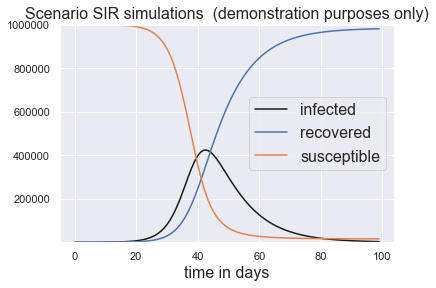

In [6]:
fig, ax1 = plt.subplots(1,1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label = 'infected', color = 'k')
ax1.plot(propagation_rates.index, propagation_rates.recovered, label = 'recovered')
ax1.plot(propagation_rates.index, propagation_rates.susceptible, label = 'susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)', size = 16)
ax1.set_xlabel('time in days', size = 16)
ax1.legend(loc = 'best',
           prop = {'size': 16});

# Fitting the Parameters of SIR Model

In [7]:
from scipy import optimize
from scipy import integrate

ydata = np.array(df_analyse.Germany[35:])
t = np.arange(len(ydata))

In [8]:
I0 = ydata[0]
S0 = 1000000
R0 = 0
beta

0.4

In [9]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R = SIR
    dS_dt = -beta*S*I/N0           
    dI_dt = beta*S*I/N0-gamma*I
    dR_dt = gamma*I
    return dS_dt,dI_dt,dR_dt

In [10]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args = (beta, gamma))[:,1]

In [11]:
popt = [0.4,0.1]
fit_odeint(t, *popt)

array([2.70000000e+01, 3.64461007e+01, 4.91966833e+01, 6.64075008e+01,
       8.96383381e+01, 1.20994097e+02, 1.63315009e+02, 2.20432987e+02,
       2.97516902e+02, 4.01537287e+02, 5.41891102e+02, 7.31240521e+02,
       9.86636858e+02, 1.33102263e+03, 1.79523180e+03, 2.42064024e+03,
       3.26265435e+03, 4.39525934e+03, 5.91687126e+03, 7.95772492e+03,
       1.06889443e+04, 1.43332139e+04, 1.91764874e+04, 2.55792697e+04,
       3.39844923e+04, 4.49167073e+04, 5.89643268e+04, 7.67336852e+04,
       9.87628191e+04, 1.25387758e+05, 1.56569369e+05, 1.91715994e+05,
       2.29568180e+05, 2.68224802e+05, 3.05358881e+05, 3.38593262e+05,
       3.65921266e+05, 3.86026901e+05, 3.98409242e+05, 4.03309039e+05,
       4.01508711e+05, 3.94096301e+05, 3.82260196e+05, 3.67144307e+05,
       3.49764662e+05, 3.30974003e+05, 3.11457875e+05, 2.91748230e+05,
       2.72244800e+05, 2.53238254e+05, 2.34931993e+05, 2.17461167e+05,
       2.00908526e+05, 1.85317256e+05, 1.70701154e+05, 1.57052578e+05,
      

In [12]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: overflow encountered in double_scalars
  app.launch_new_instance()
C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: overflow encountered in double_scalars
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)
C:\Users\Admin\Anaconda3\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


standard deviation errors :  [0.00252111 0.00231062]  start infect: 27
Optimal parameters: beta = 0.133970897819259  and gamma =  0.04700580601541655


In [13]:
fitted = fit_odeint(t,*popt)

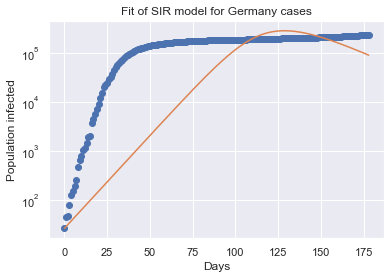

Optimal parameters: beta = 0.133970897819259  and gamma =  0.04700580601541655
Basic Reproduction Number R0  2.8500925561263735
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [14]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")

# Dynamic beta in SIR (infection rate)

In [15]:
t_initial = 25
t_intro_measures = 21
t_hold = 60
t_partial_relax = 45
t_complete_relax = 20

beta_max = 0.4
beta_min =0.11
gamma = 0.1
pd_beta = np.concatenate((np.array(t_initial*[beta_max]),
                         np.linspace(beta_max,beta_min,t_intro_measures),
                         np.array(t_hold*[beta_min]),
                         np.linspace(beta_min,beta_max,t_partial_relax),
                         np.array(t_complete_relax*[beta_max])))

pd_beta

array([0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.4       , 0.4       , 0.4       , 0.4       ,
       0.4       , 0.3855    , 0.371     , 0.3565    , 0.342     ,
       0.3275    , 0.313     , 0.2985    , 0.284     , 0.2695    ,
       0.255     , 0.2405    , 0.226     , 0.2115    , 0.197     ,
       0.1825    , 0.168     , 0.1535    , 0.139     , 0.1245    ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11      ,
       0.11      , 0.11      , 0.11      , 0.11      , 0.11   

In [16]:
SIR = np.array([S0,I0,R0])
propagation_rates = pd.DataFrame(columns = {'susceptible':S0,
                                           'infected':I0,
                                           'recovered':R0})



for each_beta in pd_beta:
   
    new_delta_vec = SIR_model(SIR,each_beta,gamma)
   
    SIR = SIR + new_delta_vec
    
    propagation_rates = propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)
    
propagation_rates

,susceptible,infected,recovered
0,999989.200000,35.100000,2.700000
1,999975.160152,45.629848,6.210000
2,999956.908666,59.318350,10.772985
3,999933.182348,77.112832,16.704820
4,999902.339277,100.244620,24.416103
5,999862.245344,130.314091,34.440565
6,999810.126889,169.401137,47.471974
7,999742.379300,220.208613,64.412088
8,999654.318547,286.248504,86.432949
9,999539.858725,372.083475,115.057800


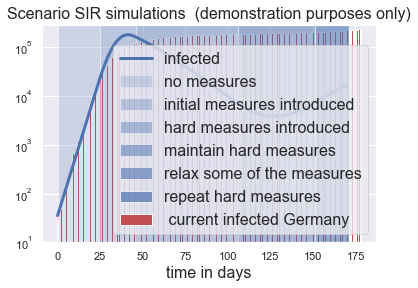

In [17]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index, propagation_rates.infected, label = 'infected', linewidth = 3)

t_phases = np.array([t_initial, t_intro_measures, t_hold, t_partial_relax, t_complete_relax]).cumsum()
ax1.bar(np.arange(len(ydata)), ydata, width = 0.8, label = ' current infected Germany', color = 'r')
ax1.axvspan(0, t_phases[0], facecolor = 'b', alpha=0.2,label='no measures')
ax1.axvspan(t_phases[0], t_phases[1], facecolor = 'b', alpha = 0.3, label = 'initial measures introduced')
ax1.axvspan(t_phases[1], t_phases[2], facecolor = 'b', alpha = 0.4, label = 'hard measures introduced')
ax1.axvspan(t_phases[2], t_phases[3], facecolor = 'b', alpha = 0.5, label = 'maintain hard measures')
ax1.axvspan(t_phases[3], t_phases[4], facecolor = 'b', alpha = 0.6, label = 'relax some of the measures')
ax1.axvspan(t_phases[4], len(propagation_rates.infected), facecolor = 'b', alpha = 0.7, label = 'repeat hard measures')

ax1.set_ylim(10, 1.6*max(propagation_rates.infected))
ax1.set_yscale('log')
ax1.set_title('Scenario SIR simulations  (demonstration purposes only)',size = 16)
ax1.set_xlabel('time in days',size = 16)
ax1.legend(loc = 'best',
           prop = {'size': 16});